# Import the Dependencies

    Sentiment Analysis (also known as opinion mining or emotion AI) is a branch of natural language processing that determines the disposition of people's opinions (Positive/Negative/Neutral) in unstructured text.

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
warnings.filterwarnings('ignore')
sns.set(style='darkgrid')

[nltk_data] Downloading package punkt to C:\Users\Devmallya
[nltk_data]     Karar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Devmallya
[nltk_data]     Karar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Devmallya
[nltk_data]     Karar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


    We will be using rule based approach in here. This is a practical method for analysing text that does not require any training or the use of machine learning models. This method yields a set of principles based on which the text is classified as positive, negative, or neutral. Lexicons are another name for these rules. As a result, the Rule-based method is also known as the Lexicon-based approach. TextBlob, VADER, and SentiWordNet are some of the most widely utilised lexicon-based techniques.

# Load the Dataset

In [2]:
df = pd.read_csv('E:/PIP_Devmallya/Week_3/Problem_2/Tweets_input.csv')
df.head()

,tweet_id,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,5.703010e+17,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
df.shape

(14640, 9)

In [4]:
df.columns

Index(['tweet_id', 'airline', 'name', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone'],
      dtype='object')

    Our dataset has a total of 14640 observations(text).

# Dropping the unnecessary columns to work on only text column

In [5]:
mydata = df.drop(columns={'tweet_id', 'airline', 'name', 'retweet_count', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'}, axis = 1)
mydata.head()

,text
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials t...
2,@VirginAmerica I didn't today... Must mean I n...
3,@VirginAmerica it's really aggressive to blast...
4,@VirginAmerica and it's a really big bad thing...


# Data Preprocessing

    In this phase, we will clean the text data by removing special characters, digits from the text, stop words, url, username, and emojis.

In [6]:
# Remove stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

In [7]:
# Remove url  
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [8]:
# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

In [9]:
# Remove html 
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [10]:
# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

In [11]:
# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [12]:
# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text

In [13]:
# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

In [14]:
def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2]

In [15]:
def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

In [16]:
def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

In [17]:
# Apply functions on tweets
mydata['final_text'] = mydata['text'].apply(lambda x : remove_username(x))
mydata['final_text'] = mydata['final_text'].apply(lambda x : remove_url(x))
mydata['final_text'] = mydata['final_text'].apply(lambda x : remove_emoji(x))
mydata['final_text'] = mydata['final_text'].apply(lambda x : decontraction(x))
mydata['final_text'] = mydata['final_text'].apply(lambda x : seperate_alphanumeric(x))
mydata['final_text'] = mydata['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
mydata['final_text'] = mydata['final_text'].apply(lambda x : char(x))
mydata['final_text'] = mydata['final_text'].apply(lambda x : x.lower())
mydata['final_text'] = mydata['final_text'].apply(lambda x : remove_stopwords(x))

In [18]:
mydata.head()

,text,final_text
0,@VirginAmerica What @dhepburn said.,said
1,@VirginAmerica plus you've added commercials t...,plus added commercials experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,really big bad thing


# POS Tagging, Tokenization of the clean sentences

    Tokenization is the process of breaking down a large text into smaller tokens. It can be done at the sentence or word level (sentence tokenization) (word tokenization).

    I'll use the nltk tokenize function word tokenize to conduct word-level tokenization.

    The process of transforming each token into a tuple with the type Parts of Speech (POS) tagging (word, tag). POS tagging is required for Lemmatization and to maintain the context of the word.

    The nltk pos tag function may be used to do this.

In [19]:
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

mydata['POS tagged'] = mydata['final_text'].apply(token_stop_pos)
mydata.head()

,text,final_text,POS tagged
0,@VirginAmerica What @dhepburn said.,said,"[(said, v)]"
1,@VirginAmerica plus you've added commercials t...,plus added commercials experience tacky,"[(plus, None), (added, a), (commercials, n), (..."
2,@VirginAmerica I didn't today... Must mean I n...,today must mean need take another trip,"[(today, n), (must, None), (mean, v), (need, N..."
3,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...,"[(really, r), (aggressive, a), (blast, n), (ob..."
4,@VirginAmerica and it's a really big bad thing...,really big bad thing,"[(really, r), (big, a), (bad, a), (thing, n)]"


    Token stop pos is a function that takes a string of text and tokenizes it, eliminates stopwords, and tags the words with their POS. It was applied to the 'Cleaned Reviews' column, and a new column for 'POS tagged' data was established.

    As previously stated, the WordNetLemmatizer requires POS tags in the form of 'n', 'a', and so on in order to produce an accurate Lemma. However, the POS tags returned by pos tag are in the form of 'NN,"ADJ,' and so on.

    We developed a dictionary called pos dict to map pos tag to wordnet tags. Wordnet is mapped to any pos tag that starts with J. Any pos tag that begins with R is mapped to wordnet, according to ADJ. ADV, ADV, ADV, ADV, ADV, ADV, ADV,

    Noun, Adjective, Adverb, and Verb are the tags we're looking for. Anything that isn't one of these four is set to None.

# Obtaining the stem words – Lemmatization

In [20]:
# Obtaining the stem words – Lemmatization

wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

mydata['Lemma'] = mydata['POS tagged'].apply(lemmatize)
mydata.head()

,text,final_text,POS tagged,Lemma
0,@VirginAmerica What @dhepburn said.,said,"[(said, v)]",say
1,@VirginAmerica plus you've added commercials t...,plus added commercials experience tacky,"[(plus, None), (added, a), (commercials, n), (...",plus added commercial experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,today must mean need take another trip,"[(today, n), (must, None), (mean, v), (need, N...",today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...,"[(really, r), (aggressive, a), (blast, n), (ob...",really aggressive blast obnoxious entertainm...
4,@VirginAmerica and it's a really big bad thing...,really big bad thing,"[(really, r), (big, a), (bad, a), (thing, n)]",really big bad thing


    The function lemmatize takes pos tag tuples and returns the Lemma for each word in pos tag depending on its pos. We used it on the 'POS tagged' column and generated the 'Lemma' column to hold the results.

In [21]:
mydata[['text', 'Lemma']]

,text,Lemma
0,@VirginAmerica What @dhepburn said.,say
1,@VirginAmerica plus you've added commercials t...,plus added commercial experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainm...
4,@VirginAmerica and it's a really big bad thing...,really big bad thing
...,...,...
14635,@AmericanAir thank you we got on a different f...,thank get different flight chicago
14636,@AmericanAir leaving over 20 minutes Late Flig...,leave minute late flight warning communicati...
14637,@AmericanAir Please bring American Airlines to...,please bring american airline blackberry
14638,"@AmericanAir you have my money, you change my ...",money change flight answer phone suggestion ...


# Sentiment Analysis using TextBlob

    TextBlob is a Python package for text processing. It offers a unified API for typical natural language processing (NLP) operations including part-of-speech tagging, noun phrase extraction, sentiment analysis, and more.

    The following are the two metrics that are used to assess sentiment:

    Polarity refers to the degree to which a viewpoint is favourable or negative.
    Subjectivity refers to how subjective a person's opinion is.
    TextBlob(text).
    We get the Polarity and Subjectivity values from sentiment.
    The polarity scale runs from -1 to 1. (1 is more positive, 0 is neutral, -1 is more negative).
    Subjectivity is measured on a scale of 0 to 1. (0 being very objective and 1 being very subjective).

In [22]:
# function to calculate subjectivity
def getSubjectivity(tweets):
    return TextBlob(tweets).sentiment.subjectivity

# function to calculate polarity
def getPolarity(tweets):
    return TextBlob(tweets).sentiment.polarity

# function to analyze the tweets
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

    Built routines to retrieve Polarity and Subjectivity values, as well as to label the review according to the Polarity score.

In [23]:
fin_data = pd.DataFrame(mydata[['text', 'Lemma']])

In [24]:
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,text,Lemma,Polarity,Analysis
0,@VirginAmerica What @dhepburn said.,say,0.00000,Neutral
1,@VirginAmerica plus you've added commercials t...,plus added commercial experience tacky,0.00000,Neutral
2,@VirginAmerica I didn't today... Must mean I n...,today must mean need take another trip,-0.31250,Negative
3,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainm...,0.00625,Positive
4,@VirginAmerica and it's a really big bad thing...,really big bad thing,-0.35000,Negative


In [25]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts

Neutral     5946
Positive    5542
Negative    3152
Name: Analysis, dtype: int64

    Count of positive, negative, neutral text.

# Sentiment Analysis using VADER

    Valence Aware Dictionary and Sentiment Reasoner (VADER) is an acronym for Valence Aware Dictionary and Sentiment Reasoner. Not only does Vader sentiment indicate if a remark is good or negative, but it also indicates the strength of emotion.
    The total of the intensities of positive, negative, and neutral is one. The measure used to draw the overall emotion is compound, which goes from -1 to 1.
    positive if compound >= 0.5 neutral if compound -0.5 0.5 negative if compound -0.5 >=

In [26]:
# Sentiment Analysis using VADER
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)
# function to analyse
def vader_analysis(compound):
    if compound > 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,@VirginAmerica What @dhepburn said.,say,0.00000,Neutral,0.0000,Neutral
1,@VirginAmerica plus you've added commercials t...,plus added commercial experience tacky,0.00000,Neutral,0.0000,Neutral
2,@VirginAmerica I didn't today... Must mean I n...,today must mean need take another trip,-0.31250,Negative,0.0000,Neutral
3,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainm...,0.00625,Positive,-0.3306,Neutral
4,@VirginAmerica and it's a really big bad thing...,really big bad thing,-0.35000,Negative,-0.5829,Negative


    Created routines to retrieve Vader scores and label reviews using compound scores.

In [27]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Positive    6721
Neutral     6326
Negative    1593
Name: Vader Analysis, dtype: int64

In [28]:
fin_data['Lemma'][3]

'  really aggressive blast obnoxious entertainment guest face amp little recourse'

In [29]:
fin_data['Lemma'][0]

'  say'

# Visual representation of TextBlob and VADER results

([<matplotlib.patches.Wedge at 0x19218f0fca0>,
 [Text(0.14100412634586912, 1.090925220330632, 'Positive'),
  Text(-0.49854818130326234, -0.980535420532685, 'Neutral'),
  Text(1.271887596390477, -0.4525504857450214, 'Negative')],
 [Text(0.07691134164320132, 0.5950501201803448, '45.9%'),
  Text(-0.27193537161996123, -0.5348375021087373, '43.2%'),
  Text(0.8008181162458559, -0.2849391947283468, '10.9%')])

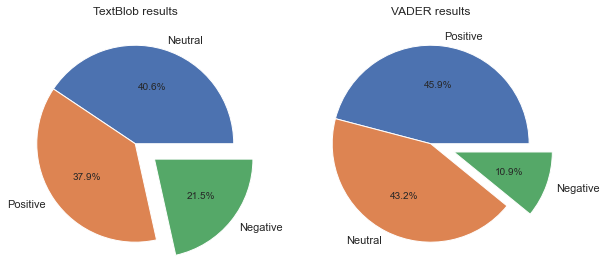

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

    In here I will take the Textblob sentiment analysis result because sentiment has been distributed and predicted in a balanced way.

    If we look at the image above, the TextBlob findings appear to be rather similar, however the VADER results show a lot of variety.

In [31]:
fin_data.head(10)

,text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,@VirginAmerica What @dhepburn said.,say,0.000000,Neutral,0.0000,Neutral
1,@VirginAmerica plus you've added commercials t...,plus added commercial experience tacky,0.000000,Neutral,0.0000,Neutral
2,@VirginAmerica I didn't today... Must mean I n...,today must mean need take another trip,-0.312500,Negative,0.0000,Neutral
3,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainm...,0.006250,Positive,-0.3306,Neutral
4,@VirginAmerica and it's a really big bad thing...,really big bad thing,-0.350000,Negative,-0.5829,Negative
5,@VirginAmerica seriously would pay $30 a fligh...,seriously would pay flight seat play really ...,-0.077778,Negative,-0.5413,Negative
6,"@VirginAmerica yes, nearly every time I fly VX...",yes nearly every time fly vx ear worm go away,0.450000,Positive,0.4019,Positive
7,@VirginAmerica Really missed a prime opportuni...,really missed prime opportunity men without ...,0.200000,Positive,0.1458,Positive
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",well,0.000000,Neutral,0.2732,Positive
9,"@VirginAmerica it was amazing, and arrived an ...",amaze arrive hour early good,0.400000,Positive,0.7506,Positive


# Filtering out only the negative sentiment rows from the fin_data dataset

In [32]:
# Taking the negative rows only
neg_row = fin_data.loc[(fin_data['Analysis'] == 'Negative')]
neg_row

,text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
2,@VirginAmerica I didn't today... Must mean I n...,today must mean need take another trip,-0.312500,Negative,0.0000,Neutral
4,@VirginAmerica and it's a really big bad thing...,really big bad thing,-0.350000,Negative,-0.5829,Negative
5,@VirginAmerica seriously would pay $30 a fligh...,seriously would pay flight seat play really ...,-0.077778,Negative,-0.5413,Negative
26,@VirginAmerica What happened 2 ur vegan food o...,happen ur vegan food option least say ur sit...,-0.075000,Negative,-0.5423,Negative
28,@VirginAmerica amazing to me that we can't get...,amaze get cold air vent vx noair worstflight...,-0.600000,Negative,0.5423,Positive
...,...,...,...,...,...,...
14610,@AmericanAir I understand the weather issue bu...,understand weather issue expect passenger wa...,-1.000000,Negative,-0.4588,Neutral
14613,"@AmericanAir I used the ""call back"" feature wi...",use call back feature operator regard flight...,-0.150000,Negative,0.0000,Neutral
14618,@AmericanAir 3078 is overweight so you pull 2 ...,overweight pull dozen passenger luggage seri...,-0.333333,Negative,-0.4939,Neutral
14631,@AmericanAir thx for nothing on getting us out...,thx nothing get us country back us broken pl...,-0.200000,Negative,-0.1531,Neutral


In [33]:
neg_row['text'][2]

"@VirginAmerica I didn't today... Must mean I need to take another trip!"

In [34]:
neg_row['Lemma'][2]

'  today must mean need take another trip'

In [35]:
neg_row["Lemma"] = neg_row["Lemma"].apply(lambda x: x.lstrip())
neg_row.head()

,text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
2,@VirginAmerica I didn't today... Must mean I n...,today must mean need take another trip,-0.312500,Negative,0.0000,Neutral
4,@VirginAmerica and it's a really big bad thing...,really big bad thing,-0.350000,Negative,-0.5829,Negative
5,@VirginAmerica seriously would pay $30 a fligh...,seriously would pay flight seat play really ba...,-0.077778,Negative,-0.5413,Negative
26,@VirginAmerica What happened 2 ur vegan food o...,happen ur vegan food option least say ur site ...,-0.075000,Negative,-0.5423,Negative
28,@VirginAmerica amazing to me that we can't get...,amaze get cold air vent vx noair worstflightev...,-0.600000,Negative,0.5423,Positive


In [36]:
neg_row['Lemma'][2]

'today must mean need take another trip'

# Applying Topic Modeling to create Negative_reason column from negative sentiment text

    The CountVectorizer is a basic tool for tokenizing a set of text documents and creating a vocabulary of known words, as well as encoding new documents with that vocabulary.
    We are using count vectorizer to vectorize the words because it is the transformation of text data into numerical vectors. These vectors are then utilised to create a variety of machine learning models. In this case, we'll refer to it as extracting characteristics from text with the goal of creating numerous natural languages, processing models, and so on.

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

    In countvectorizer we used max_df because while building our vocabulary we are going to ignore terms that have really high document frquency. This essentially get's rid of terms that are really common across a lot of the documents. Where min_df show up a minimum amount of times.
    Then we will transform the vectorize data on clean text.

In [39]:
dtm = cv.fit_transform(neg_row['Lemma'])
dtm

<3152x1885 sparse matrix of type '<class 'numpy.int64'>'
	with 24528 stored elements in Compressed Sparse Row format>

    We're not doing any train test split because it's an unsupervised learning problem.

# Checking the frequencies of the words occurs

In [40]:
word_list = [word for line in neg_row['Lemma'] for word in line.split()]
word_list[:5]

['today', 'must', 'mean', 'need', 'take']

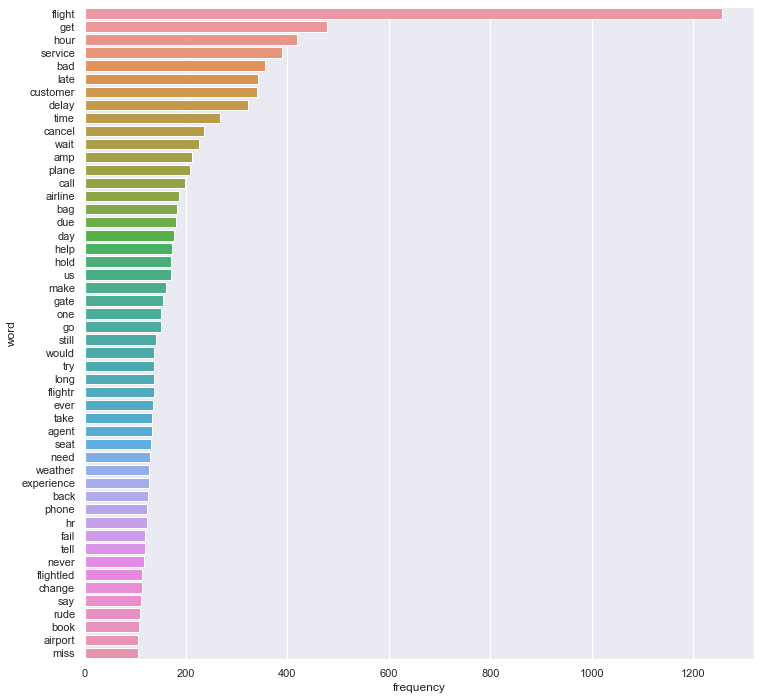

In [41]:
from collections import Counter
counts = Counter(word_list).most_common(50)
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['word', 'frequency']

fig, ax = plt.subplots(figsize = (12, 12))
ax = sns.barplot(y="word", x='frequency', ax = ax, data=counts_df)
plt.savefig('wordcount_bar.png')

    From the term frequency chart we can see that the vaccine and dose words are used more frequently in all the tweets.

# Topic Modelling

    The statistical topic modelling approach LDA (Latent Dirichlet Allocation) is widely used. In LDA, documents are represented as a collection of themes, each of which is made up of a set of words. Those individuals are discovered in a hidden layer, sometimes referred to as a latent layer. LDA is a method for tagging text in a document with a subject. It generates a model of a subject per document and a word per topic, both of which are Dirichlet distributions. It also thinks that articles cover a wide range of topics. These subjects' probability distributions are then utilised to build words.

In [42]:
from sklearn.decomposition import LatentDirichletAllocation

    n_components : Number of topics.
    random_state : Pass an int for reproducible results across multiple function calls.

In [43]:
LDA = LatentDirichletAllocation(n_components=10,random_state=42)

In [44]:
LDA.fit(dtm)

LatentDirichletAllocation(random_state=42)

    It takes time to run because it iterates each words on per topic so.

    Now we will check the length of the stored words after fitting it in the LDA model with the help of get_feature_names() function. In here we are actually grabbing the vocabulary of the words.

In [45]:
# Stored Words

len(cv.get_feature_names())

1885

    Now we will check 10 random words from our stored words between 0 to 1885.

In [46]:
import random

for i in range(10):
    random_word_id = random.randint(0,1884)
    print(cv.get_feature_names()[random_word_id])

poorservice
mistake
choppy
begin
page
search
bother
mco
costumer
cause


In [47]:
for i in range(10):
    random_word_id = random.randint(0,1884)
    print(cv.get_feature_names()[random_word_id])

downhill
bridge
crazy
bumped
sick
fraud
horrible
beach
completely
far


    In here we are grabbing the Topics.

In [48]:
# Check the total components in LDA model
len(LDA.components_)

10

    components_ Variational parameters for the distribution of subject words. Components [i, j] may be seen as a pseudocount that indicates the number of times word j was allocated to topic I since the complete conditional for topic word distribution is a Dirichlet.

In [49]:
LDA.components_

array([[ 0.1000064 ,  0.10003489,  0.1       , ...,  0.10004917,
         0.1       ,  0.1       ],
       [ 6.36177885,  0.10008458,  0.1000177 , ...,  1.36585337,
         1.09998873,  1.09999376],
       [ 1.16238912,  0.1       ,  7.60779526, ...,  0.1       ,
         0.1       ,  0.1       ],
       ...,
       [ 8.04468564,  0.10001382,  0.1       , ...,  3.36984484,
         0.1       ,  0.1       ],
       [ 0.1000067 ,  0.1       ,  0.1       , ...,  0.10001103,
         2.10001126,  1.10000624],
       [22.75019331,  3.05373614,  0.10000087, ...,  0.10002092,
         0.1       ,  0.1       ]])

In [50]:
len(LDA.components_[0])

1885

In [51]:
# In single we will check how many components are present in one.
single_topic = LDA.components_[0]

In [52]:
single_topic.argsort()

array([1359, 1147,  836, ..., 1085,  741,  633], dtype=int64)

    In here the argsort() will returns the index positions that would sort this array and showing the locations of these larger values.

    We are taking these single topics and then figure out what index positions we will look at for high probability words for this particular single topic.

In [53]:
single_topic[1359]

0.10000000010550723

In [54]:
single_topic[836]

0.10000000011919484

In [55]:
single_topic.argsort()[-10:]

array([1005, 1655,  764, 1600,  983, 1241,  691, 1085,  741,  633],
      dtype=int64)

In [56]:
top_word_indices = single_topic.argsort()[-10:]

In [57]:
for index in top_word_indices:
    print(cv.get_feature_names()[index])

mean
thanks
help
suck
make
point
fuck
need
guy
flight


    We'll look at the terms that come up often in each topic. Actually we are showing top 15 words for 7 topic with the highest probability.

In [58]:
for index, topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['disappointed', 'change', 'trip', 'tomorrow', 'fail', 'mean', 'thanks', 'help', 'suck', 'make', 'point', 'fuck', 'need', 'guy', 'flight']


THE TOP 15 WORDS FOR TOPIC #1
['tell', 'delay', 'luggage', 'thanks', 'flightr', 'day', 'time', 'airport', 'airline', 'lose', 'late', 'hour', 'bad', 'bag', 'flight']


THE TOP 15 WORDS FOR TOPIC #2
['want', 'time', 'bad', 'fleek', 'book', 'kid', 'check', 'flight', 'try', 'seat', 'amp', 'complaint', 'airline', 'horrible', 'fail']


THE TOP 15 WORDS FOR TOPIC #3
['day', 'tweet', 'like', 'wait', 'fly', 'terrible', 'rude', 'worst', 'poor', 'experience', 'time', 'airline', 'bad', 'service', 'customer']


THE TOP 15 WORDS FOR TOPIC #4
['people', 'horrible', 'wrong', 'ticket', 'travel', 'experience', 'worst', 'flight', 'awful', 'rude', 'terrible', 'gate', 'customer', 'agent', 'service']


THE TOP 15 WORDS FOR TOPIC #5
['problem', 'make', 'flightr', 'min', 'phone', 'late', 'book', 'help', 'time', 'minute', 'try', 'wait', 'flig

## Attaching Discovered Topic Labels to Original Articles

In [59]:
dtm

<3152x1885 sparse matrix of type '<class 'numpy.int64'>'
	with 24528 stored elements in Compressed Sparse Row format>

In [60]:
dtm.shape

(3152, 1885)

In [61]:
len(neg_row)

3152

In [62]:
topic_results = LDA.transform(dtm)

In [63]:
topic_results.shape

(3152, 10)

In [64]:
topic_results[2]

array([0.0090922 , 0.00909336, 0.00909244, 0.44549707, 0.00909097,
       0.00909125, 0.48176586, 0.00909182, 0.00909333, 0.0090917 ])

In [65]:
topic_results[2].round(2)

array([0.01, 0.01, 0.01, 0.45, 0.01, 0.01, 0.48, 0.01, 0.01, 0.01])

In [66]:
topic_results[2].argmax()

6

In [67]:
neg_row.head()

,text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
2,@VirginAmerica I didn't today... Must mean I n...,today must mean need take another trip,-0.312500,Negative,0.0000,Neutral
4,@VirginAmerica and it's a really big bad thing...,really big bad thing,-0.350000,Negative,-0.5829,Negative
5,@VirginAmerica seriously would pay $30 a fligh...,seriously would pay flight seat play really ba...,-0.077778,Negative,-0.5413,Negative
26,@VirginAmerica What happened 2 ur vegan food o...,happen ur vegan food option least say ur site ...,-0.075000,Negative,-0.5423,Negative
28,@VirginAmerica amazing to me that we can't get...,amaze get cold air vent vx noair worstflightev...,-0.600000,Negative,0.5423,Positive


In [68]:
topic_results.argmax(axis=1)

array([0, 0, 6, ..., 8, 7, 6], dtype=int64)

In [69]:
neg_row['Topic'] = topic_results.argmax(axis=1)

In [70]:
neg_row.head(30)

,text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,Topic
2,@VirginAmerica I didn't today... Must mean I n...,today must mean need take another trip,-0.312500,Negative,0.0000,Neutral,0
4,@VirginAmerica and it's a really big bad thing...,really big bad thing,-0.350000,Negative,-0.5829,Negative,0
5,@VirginAmerica seriously would pay $30 a fligh...,seriously would pay flight seat play really ba...,-0.077778,Negative,-0.5413,Negative,6
26,@VirginAmerica What happened 2 ur vegan food o...,happen ur vegan food option least say ur site ...,-0.075000,Negative,-0.5423,Negative,7
28,@VirginAmerica amazing to me that we can't get...,amaze get cold air vent vx noair worstflightev...,-0.600000,Negative,0.5423,Positive,6
32,"@VirginAmerica help, left expensive headphones...",help leave expensive headphone flight iad lax ...,-0.500000,Negative,0.7003,Positive,6
41,"@VirginAmerica Hey, first time flyer next week...",hey first time flyer next week excite hard tim...,-0.013889,Negative,0.6597,Positive,5
63,@VirginAmerica @LadyGaga @CarrieUnderwood Sorr...,sorry mary martin first,-0.125000,Negative,-0.0772,Neutral,7
84,@VirginAmerica it was a disappointing experien...,disappointing experience share every business ...,-0.600000,Negative,-0.2500,Neutral,3
85,@VirginAmerica I’m having trouble adding this ...,trouble add flight wife book elevate account help,-0.200000,Negative,0.0000,Neutral,5


# After getting the top 10 topics, naming them manually with negative reason 

In [71]:
neg_row.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3152 entries, 2 to 14636
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   text             3152 non-null   object 
 1   Lemma            3152 non-null   object 
 2   Polarity         3152 non-null   float64
 3   Analysis         3152 non-null   object 
 4   Vader Sentiment  3152 non-null   float64
 5   Vader Analysis   3152 non-null   object 
 6   Topic            3152 non-null   int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 261.5+ KB


In [72]:
neg_row['Topic'] = neg_row['Topic'].astype('str')

In [73]:
neg_row.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3152 entries, 2 to 14636
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   text             3152 non-null   object 
 1   Lemma            3152 non-null   object 
 2   Polarity         3152 non-null   float64
 3   Analysis         3152 non-null   object 
 4   Vader Sentiment  3152 non-null   float64
 5   Vader Analysis   3152 non-null   object 
 6   Topic            3152 non-null   object 
dtypes: float64(2), object(5)
memory usage: 261.5+ KB


In [74]:
neg_row['Topic'] = neg_row['Topic'].map({'0': 'Flight Booking Problems', '1': 'Late Flight', '2': 'Flight Attendant Complaints', '3': 'Can\'t Tell', '4': 'Customer Service Issue', '5': 'longlines',
                                         '6': 'Cancelled Flight', '7': 'Bad Flight', '8': 'Damaged Luggage', '9': 'Lost Luggage'})

In [75]:
neg_row.head(10)

,text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,Topic
2,@VirginAmerica I didn't today... Must mean I n...,today must mean need take another trip,-0.312500,Negative,0.0000,Neutral,Flight Booking Problems
4,@VirginAmerica and it's a really big bad thing...,really big bad thing,-0.350000,Negative,-0.5829,Negative,Flight Booking Problems
5,@VirginAmerica seriously would pay $30 a fligh...,seriously would pay flight seat play really ba...,-0.077778,Negative,-0.5413,Negative,Cancelled Flight
26,@VirginAmerica What happened 2 ur vegan food o...,happen ur vegan food option least say ur site ...,-0.075000,Negative,-0.5423,Negative,Bad Flight
28,@VirginAmerica amazing to me that we can't get...,amaze get cold air vent vx noair worstflightev...,-0.600000,Negative,0.5423,Positive,Cancelled Flight
32,"@VirginAmerica help, left expensive headphones...",help leave expensive headphone flight iad lax ...,-0.500000,Negative,0.7003,Positive,Cancelled Flight
41,"@VirginAmerica Hey, first time flyer next week...",hey first time flyer next week excite hard tim...,-0.013889,Negative,0.6597,Positive,longlines
63,@VirginAmerica @LadyGaga @CarrieUnderwood Sorr...,sorry mary martin first,-0.125000,Negative,-0.0772,Neutral,Bad Flight
84,@VirginAmerica it was a disappointing experien...,disappointing experience share every business ...,-0.600000,Negative,-0.2500,Neutral,Can't Tell
85,@VirginAmerica I’m having trouble adding this ...,trouble add flight wife book elevate account help,-0.200000,Negative,0.0000,Neutral,longlines


In [76]:
neg_row.Topic

2        Flight Booking Problems
4        Flight Booking Problems
5               Cancelled Flight
26                    Bad Flight
28              Cancelled Flight
                  ...           
14610           Cancelled Flight
14613                  longlines
14618            Damaged Luggage
14631                 Bad Flight
14636           Cancelled Flight
Name: Topic, Length: 3152, dtype: object

In [77]:
fin_data.shape

(14640, 6)

# Adding the neg_row dataset with fin_data

In [78]:
fin_data = pd.concat([fin_data, pd.concat([neg_row['Topic']], axis=0)], axis=1)

In [79]:
fin_data.head(50)

,text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,Topic
0,@VirginAmerica What @dhepburn said.,say,0.000000,Neutral,0.0000,Neutral,NaN
1,@VirginAmerica plus you've added commercials t...,plus added commercial experience tacky,0.000000,Neutral,0.0000,Neutral,NaN
2,@VirginAmerica I didn't today... Must mean I n...,today must mean need take another trip,-0.312500,Negative,0.0000,Neutral,Flight Booking Problems
3,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainm...,0.006250,Positive,-0.3306,Neutral,NaN
4,@VirginAmerica and it's a really big bad thing...,really big bad thing,-0.350000,Negative,-0.5829,Negative,Flight Booking Problems
5,@VirginAmerica seriously would pay $30 a fligh...,seriously would pay flight seat play really ...,-0.077778,Negative,-0.5413,Negative,Cancelled Flight
6,"@VirginAmerica yes, nearly every time I fly VX...",yes nearly every time fly vx ear worm go away,0.450000,Positive,0.4019,Positive,NaN
7,@VirginAmerica Really missed a prime opportuni...,really missed prime opportunity men without ...,0.200000,Positive,0.1458,Positive,NaN
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",well,0.000000,Neutral,0.2732,Positive,NaN
9,"@VirginAmerica it was amazing, and arrived an ...",amaze arrive hour early good,0.400000,Positive,0.7506,Positive,NaN


In [80]:
fin_data.shape

(14640, 7)

In [81]:
fin_data.tail(50)

,text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,Topic
14590,@AmericanAir thank you for quick responses. ...,thank quick response aa usually fantastic cu...,0.366667,Positive,0.5423,Positive,NaN
14591,@AmericanAir what are my chances of making a c...,chance make connection el paso aa dfw sit aa...,0.000000,Neutral,-0.0772,Neutral,NaN
14592,@AmericanAir beyond frustrated with no call b...,beyond frustrate call back auto hold whateve...,0.000000,Neutral,-0.4019,Neutral,NaN
14593,@AmericanAir ahhhh your silence is golden now....,ahh silence golden top anyone get fire,0.400000,Positive,-0.1531,Neutral,NaN
14594,@AmericanAir Hey AA - can you help with an iti...,hey aa help itinerary plat custy stick pvr p...,0.000000,Neutral,0.4019,Positive,NaN
14595,@AmericanAir @ShannonBloom Where's my DM? Wher...,dm voucher pay cab car back jfk tomorrow,0.000000,Neutral,-0.1027,Neutral,NaN
14596,@AmericanAir we've been on hold for hours.,hold hour,0.000000,Neutral,0.0000,Neutral,NaN
14597,@AmericanAir @Stone9956 Do you dislike delays ...,dislike delay cause crew forget load bag amp...,-0.250000,Negative,-0.7906,Negative,Cancelled Flight
14598,@AmericanAir can you guys help me please?,guy help please,0.000000,Neutral,0.6124,Positive,NaN
14599,@AmericanAir @travisamex It's not the weather....,weather also gross incompetence understaffin...,0.000000,Neutral,-0.7184,Negative,NaN


In [82]:
fin_data.shape

(14640, 7)

In [83]:
df.shape

(14640, 9)

In [84]:
fin_data = fin_data.drop(['text', 'Lemma', 'Vader Analysis'], axis = 1)

In [85]:
fin_data.head()

,Polarity,Analysis,Vader Sentiment,Topic
0,0.00000,Neutral,0.0000,NaN
1,0.00000,Neutral,0.0000,NaN
2,-0.31250,Negative,0.0000,Flight Booking Problems
3,0.00625,Positive,-0.3306,NaN
4,-0.35000,Negative,-0.5829,Flight Booking Problems


In [86]:
df.head()

,tweet_id,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,5.703010e+17,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Creating a new DataFrame with the actual df and fin_data df

In [87]:
new_df = pd.concat([df, pd.concat([fin_data], axis=0)], axis=1)

In [89]:
new_df.head(10)

,tweet_id,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,Polarity,Analysis,Vader Sentiment,Topic
0,5.703060e+17,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0.000000,Neutral,0.0000,NaN
1,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),0.000000,Neutral,0.0000,NaN
2,5.703010e+17,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),-0.312500,Negative,0.0000,Flight Booking Problems
3,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),0.006250,Positive,-0.3306,NaN
4,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),-0.350000,Negative,-0.5829,Flight Booking Problems
5,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),-0.077778,Negative,-0.5413,Cancelled Flight
6,5.703010e+17,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada),0.450000,Positive,0.4019,NaN
7,5.703000e+17,Virgin America,pilot,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada),0.200000,Positive,0.1458,NaN
8,5.703000e+17,Virgin America,dhepburn,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada),0.000000,Neutral,0.2732,NaN
9,5.702950e+17,Virgin America,YupitsTate,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada),0.400000,Positive,0.7506,NaN


In [90]:
# Renaming the columns names
new_df = new_df.rename(columns={"Polarity": "airline_sentiment_confidence", "Analysis": "airline_sentiment", "Vader Sentiment": "negativereason_confidence", "Topic": "negativereason"})
new_df.head()

,tweet_id,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,airline_sentiment_confidence,airline_sentiment,negativereason_confidence,negativereason
0,5.703060e+17,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0.00000,Neutral,0.0000,NaN
1,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),0.00000,Neutral,0.0000,NaN
2,5.703010e+17,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),-0.31250,Negative,0.0000,Flight Booking Problems
3,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),0.00625,Positive,-0.3306,NaN
4,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),-0.35000,Negative,-0.5829,Flight Booking Problems


# Arranging the columns

In [91]:
# Change the column positions
first_column_1 = new_df.pop('negativereason_confidence')
new_df.insert(0, 'negativereason_confidence', first_column_1)
new_df.head()

,negativereason_confidence,tweet_id,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,airline_sentiment_confidence,airline_sentiment,negativereason
0,0.0000,5.703060e+17,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0.00000,Neutral,NaN
1,0.0000,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),0.00000,Neutral,NaN
2,0.0000,5.703010e+17,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),-0.31250,Negative,Flight Booking Problems
3,-0.3306,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),0.00625,Positive,NaN
4,-0.5829,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),-0.35000,Negative,Flight Booking Problems


In [92]:
# Change the column positions
first_column_2 = new_df.pop('negativereason')
new_df.insert(0, 'negativereason', first_column_2)
new_df.head()

,negativereason,negativereason_confidence,tweet_id,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,airline_sentiment_confidence,airline_sentiment
0,NaN,0.0000,5.703060e+17,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0.00000,Neutral
1,NaN,0.0000,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),0.00000,Neutral
2,Flight Booking Problems,0.0000,5.703010e+17,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),-0.31250,Negative
3,NaN,-0.3306,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),0.00625,Positive
4,Flight Booking Problems,-0.5829,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),-0.35000,Negative


In [93]:
# Change the column positions
first_column_3 = new_df.pop('airline_sentiment_confidence')
new_df.insert(0, 'airline_sentiment_confidence', first_column_3)
new_df.head()

,airline_sentiment_confidence,negativereason,negativereason_confidence,tweet_id,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,airline_sentiment
0,0.00000,NaN,0.0000,5.703060e+17,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),Neutral
1,0.00000,NaN,0.0000,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),Neutral
2,-0.31250,Flight Booking Problems,0.0000,5.703010e+17,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),Negative
3,0.00625,NaN,-0.3306,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),Positive
4,-0.35000,Flight Booking Problems,-0.5829,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),Negative


In [94]:
# Change the column positions
first_column_4 = new_df.pop('airline_sentiment')
new_df.insert(0, 'airline_sentiment', first_column_4)
new_df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,tweet_id,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,Neutral,0.00000,NaN,0.0000,5.703060e+17,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,Neutral,0.00000,NaN,0.0000,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,Negative,-0.31250,Flight Booking Problems,0.0000,5.703010e+17,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,Positive,0.00625,NaN,-0.3306,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,Negative,-0.35000,Flight Booking Problems,-0.5829,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [95]:
# Change the column positions
first_column_5 = new_df.pop('tweet_id')
new_df.insert(0, 'tweet_id', first_column_5)
new_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,Neutral,0.00000,NaN,0.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,5.703010e+17,Neutral,0.00000,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,5.703010e+17,Negative,-0.31250,Flight Booking Problems,0.0000,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,5.703010e+17,Positive,0.00625,NaN,-0.3306,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,5.703010e+17,Negative,-0.35000,Flight Booking Problems,-0.5829,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [96]:
new_df.shape

(14640, 13)

In [97]:
new_df.to_csv('E:/PIP_Devmallya/Week_3/Problem_2/tweets_2.csv', index = False)